In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report,plot_confusion_matrix
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
dataset = pd.read_csv('./Data/Restaurant_Reviews.tsv', delimiter='\t',quoting =3)

## Basic Checking of dataset

In [6]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


## Use natural language tool kit to parse the text 

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
corpus = []
#Iterate over the reviews
for i in range(0,1000):
    #replace all punctuations by spaces
    review = re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    #make everything lower case
    review = review.lower()
    #split into words
    review = review.split()
    #Remove morphological affixes from words, leaving only the word stem by using the stemmer
    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    ##Remove the not from the stop words so we do not remove some meaning from the reviews
    all_stopwords.remove('not')
    # look at each word and make sure its not a stop word then convert the words to review to mean same things via porter stemmer
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    #join all the words back in a review with a space
    review = ' '.join(review)
    corpus.append(review)

In [11]:
##Check the data after the preprocessing
corpus

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would not go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place not worth time let alon vega',
 'not like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow

In [12]:
##Tokenizing the input
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [16]:
print('Shape of X: ',X.shape) # previous was 1566, we reduce it to 1500 to drop a few words
print('Shape of y: ',y.shape)

Shape of X:  (1000, 1500)
Shape of y:  (1000,)


In [17]:
#Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [18]:
#Lets try with the simple gussian naive bayes classifier
classifier = GaussianNB()
classifier.fit(X_train,y_train)
pred = classifier.predict(X_test)

In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62       102
           1       0.63      0.81      0.71        98

    accuracy                           0.67       200
   macro avg       0.69      0.67      0.67       200
weighted avg       0.69      0.67      0.66       200



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


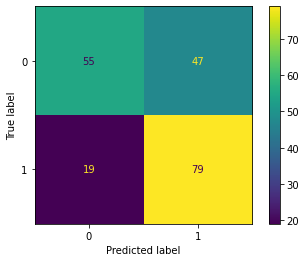

In [21]:
plot_confusion_matrix(classifier,X_test,y_test)

In [22]:
# Lets try the support vector machine classifier
svc = LinearSVC()
svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.77      0.87      0.82        98

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


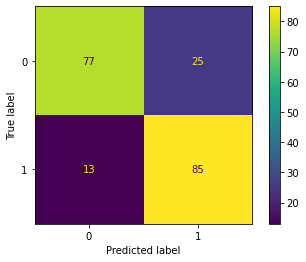

In [23]:
plot_confusion_matrix(svc,X_test,y_test)

In [48]:
##Lets try and fine tune this SVC method a bit
svc2 = LinearSVC(max_iter=5000)

grid_param = {'C':np.logspace(-3,-0.5,10)}
grid_svc = GridSearchCV(svc2,grid_param)
grid_svc.fit(X_train,y_train)

GridSearchCV(estimator=LinearSVC(max_iter=5000),
             param_grid={'C': array([0.001     , 0.00189574, 0.00359381, 0.00681292, 0.0129155 ,
       0.02448437, 0.04641589, 0.08799225, 0.16681005, 0.31622777])})

In [49]:
svc2_pred = grid_svc.predict(X_test)
print(classification_report(y_test,svc2_pred))

              precision    recall  f1-score   support

           0       0.88      0.79      0.84       102
           1       0.81      0.89      0.84        98

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [50]:
grid_svc.best_params_

{'C': 0.024484367468222266}

C:\Users\Fabian\anaconda3\envs\fab_mach_learn\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


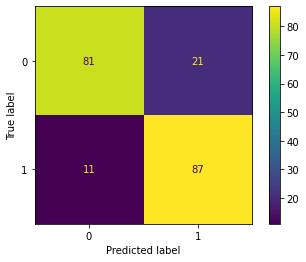

In [51]:
plot_confusion_matrix(grid_svc,X_test,y_test)

## Updating the regularization can move it to 84% F1 score

In [52]:
np.logspace(-3,0,10)

array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])

In [53]:
##Try to use the ada boost classifier 
ada_boost = AdaBoostClassifier(random_state=101)
ada_param = {'n_estimators':[25,50,75,100,200],
            'learning_rate':np.logspace(-3,0,10)}
grid_cv_ada = GridSearchCV(ada_boost,ada_param)
grid_cv_ada.fit(X_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(random_state=101),
             param_grid={'learning_rate': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ]),
                         'n_estimators': [25, 50, 75, 100, 200]})

In [54]:
ada_pred = grid_cv_ada.predict(X_test)
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       102
           1       0.84      0.80      0.82        98

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



In [55]:
grid_cv_ada.best_params_

{'learning_rate': 0.21544346900318823, 'n_estimators': 200}

In [56]:
## Lets try hugging face sentiment classifier straight out of the box
from transformers import pipeline

In [70]:
transformer_X = dataset.iloc[:,0]
transformer_y= dataset.iloc[:,-1].values

In [71]:
transformer_X.shape

(1000,)

In [72]:
transformer_X

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [73]:
X_train, X_test, y_train, y_test = train_test_split(transformer_X, transformer_y, test_size=0.2, random_state=101)

In [155]:
#convert from object to string for the hugging face input
test= X_test.reset_index(drop=True)
test

0                  Just spicy enough.. Perfect actually.
1            Never again will I be dining at this place!
2                                          Sooooo good!!
3      I have never had such bland food which surpris...
4      I'm not really sure how Joey's was voted best ...
                             ...                        
195    We got the food and apparently they have never...
196    My ribeye steak was cooked perfectly and had g...
197    Only Pros : Large seating area/ Nice bar area/...
198        The classic Maine Lobster Roll was fantastic.
199    The steak was amazing...rge fillet relleno was...
Name: Review, Length: 200, dtype: object

In [156]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [157]:
#Convert into a list of strings for the transformer
test_list = []
for i in range(0,200):
    test_list.append(test2[i])
#test_list

In [158]:
transformer_pred = classifier(test_list)

In [161]:
#Pull out the predictions from the list of dictionaries and map it to 1: Positive 0: Negative for the classification report
predictions = []
for i in range(len(transformer_pred)):
    result = transformer_pred[i]['label']
    if result == "POSITIVE":
        predictions.append(1)
    else:
        predictions.append(0)

In [162]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       102
           1       0.89      0.93      0.91        98

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



## Out of box transformer model without training has 91% accuracy in sentiment analysis which is much better than our machine learning models